In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [7]:
df=pd.read_csv("C:\\Users\\Expert\\Downloads\\international-airline-passengers.csv",parse_dates=["Month"],index_col="Month")

In [8]:
df.head()

,International passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [38]:
df.tail()

,International passengers,international passe,International passe7
Month,,,
1960-08-01,606,-16.0,189.0
1960-09-01,508,-98.0,117.0
1960-10-01,461,-47.0,42.0
1960-11-01,390,-71.0,-71.0
1960-12-01,432,42.0,-40.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   International passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [10]:
df.isna().sum()

International passengers    0
dtype: int64

In [11]:
df[df.duplicated()].shape

(26, 1)

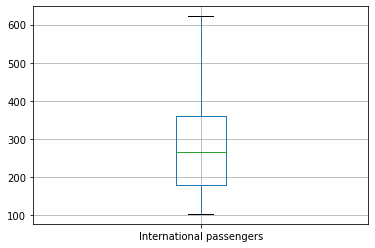

In [12]:
df.boxplot()

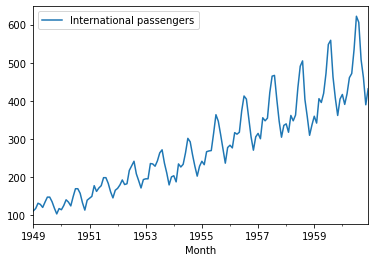

In [13]:
df.plot()

#now checking whether the data is stationary or not
#we are using argumented dicky fuller test

In [14]:
from statsmodels.tsa.stattools import adfuller
res=adfuller(df)
p_val=res[1]
if p_val>0.05:
    print("not stationary")
else:
    print("stationary")

not stationary


In [15]:
res

(0.8153688792060423,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

# time series decomposition

In [16]:
from statsmodels.api import tsa

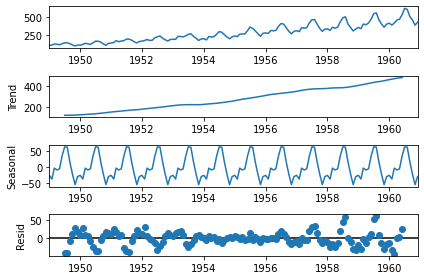

In [17]:
decomp=tsa.seasonal_decompose(df)
fig=decomp.plot()

# differencing
1)y(t)-y(t-1)

In [18]:
df["international passe"]=df["International passengers"]-df["International passengers"].shift(1)

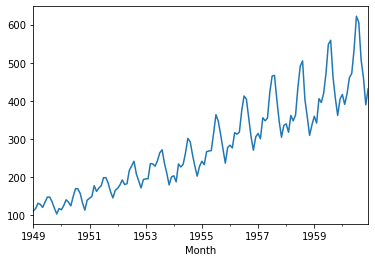

In [19]:
df["International passengers"].plot()

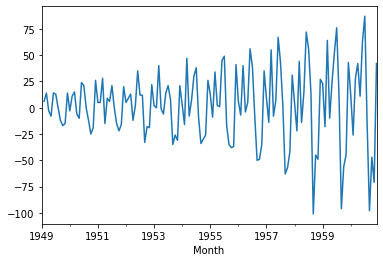

In [20]:
df["international passe"].plot()

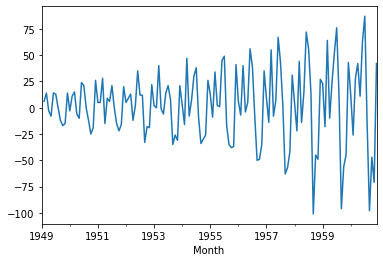

In [21]:
df["International passengers"].diff().plot()

# seasonal differencing
2)y(t)-y(t-n)

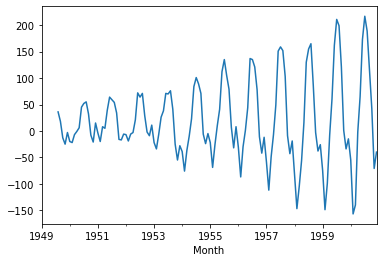

In [22]:
n=7
df["International passe7"]=df["International passengers"]-df["International passengers"].shift(7)
df["International passe7"].plot()

In [23]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

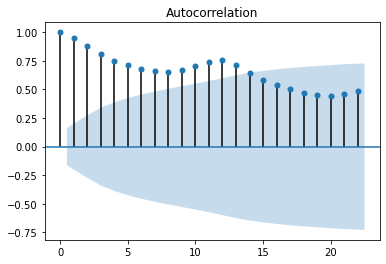

In [24]:
fig=plot_acf(df["International passengers"])

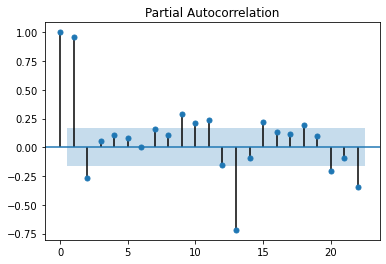

In [25]:
fig=plot_pacf(df["International passengers"])

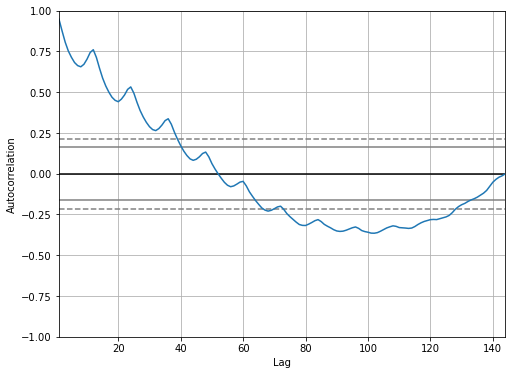

In [28]:
fig=plt.figure(figsize=(8,6))
pd.plotting.autocorrelation_plot(df["International passengers"])

In [29]:
from statsmodels.tsa.ar_model import AR

In [33]:
x=df["International passengers"]
model=AR(x)
model_fit=model.fit()

C:\Users\Expert\Documents\Desktop\soft\ANACONDA\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_W

In [34]:
print("lag value selected by model:",model_fit.k_ar)

lag value selected by model: 13


In [35]:
print(model_fit.params)

const                           5.148972
L1.International passengers     0.760839
L2.International passengers    -0.085279
L3.International passengers     0.044238
L4.International passengers    -0.041790
L5.International passengers     0.054281
L6.International passengers    -0.052773
L7.International passengers     0.033219
L8.International passengers    -0.099693
L9.International passengers     0.145556
L10.International passengers   -0.125891
L11.International passengers    0.143583
L12.International passengers    0.907057
L13.International passengers   -0.665976
dtype: float64


In [36]:
ypred=model_fit.predict()

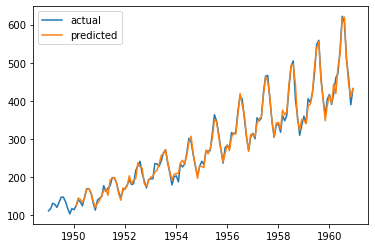

In [37]:
plt.plot(x,label="actual")
plt.plot(ypred,label="predicted")
plt.legend()

In [40]:
pred=model_fit.predict(start="1960-12-01",end="1961-12-01")
pred

1960-12-01    432.873609
1961-01-01    449.539299
1961-02-01    419.018440
1961-03-01    449.070774
1961-04-01    496.285946
1961-05-01    519.569404
1961-06-01    586.985772
1961-07-01    683.173386
1961-08-01    658.360220
1961-09-01    561.569673
1961-10-01    503.999788
1961-11-01    430.618176
1961-12-01    470.296712
Freq: MS, dtype: float64

In [41]:
residual=model_fit.resid

In [42]:
residual

Month
1950-02-01    -0.008475
1950-03-01    -4.611311
1950-04-01    -6.988589
1950-05-01    -9.054539
1950-06-01     3.396957
                ...    
1960-08-01   -13.989699
1960-09-01    -2.946553
1960-10-01    17.121872
1960-11-01   -20.931568
1960-12-01    -0.873609
Length: 131, dtype: float64